

# Load both CSV files


In [222]:
import pandas as pd

# Load both CSV files
df1 = pd.read_csv("C:\\Users\\pooja\\Downloads\\purchase_behaviour.csv")
df2 = pd.read_csv("C:\\Users\\pooja\\Downloads\\transaction_data.csv")

# Merge on a common column
merged_df = pd.merge(df1, df2,on='LYLTY_CARD_NBR',how="outer")  

# Save the merged data
merged_df.to_csv("merged_output.csv", index=False)


Dataset

In [223]:
merged_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9
...,...,...,...,...,...,...,...,...,...,...
264831,2370701,YOUNG FAMILIES,Mainstream,43442,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2
264832,2370751,YOUNG FAMILIES,Premium,43374,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
264833,2370961,OLDER FAMILIES,Budget,43397,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4
264834,2370961,OLDER FAMILIES,Budget,43400,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2


# EDA Exploratory Data Analysis.

In [224]:
merged_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64

# top 3 most profitable products

In [225]:
df2.groupby(['PROD_NBR','PROD_NAME'])['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES',ascending=False)[0:3]

,PROD_NBR,PROD_NAME,TOT_SALES
3,4,Dorito Corn Chp Supreme 380g,40352.0
13,14,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
15,16,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


# information about characteristics of our most loyal customers

In [226]:
merged_df.groupby(['LIFESTAGE'])['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES',ascending=False)[0:3]

,LIFESTAGE,TOT_SALES
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90
2,OLDER FAMILIES,353767.20


In [227]:
merged_df.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES',ascending=False)[0:3]

,PREMIUM_CUSTOMER,TOT_SALES
1,Mainstream,750744.50
0,Budget,676211.55
2,Premium,507458.95


In [228]:
merged_df.groupby(['STORE_NBR'])['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES',ascending=False)[0:3]

,STORE_NBR,TOT_SALES
225,226,18905.45
87,88,16333.25
164,165,15973.75


In [229]:
df_modling=merged_df.groupby(['STORE_NBR','PREMIUM_CUSTOMER','LIFESTAGE','PROD_NAME'])['TOT_SALES'].sum()

In [230]:
df=pd.DataFrame(df_modling)

In [231]:
df.reset_index(inplace=True)

# characteristics of our most loyal customers

In [232]:
df

,STORE_NBR,PREMIUM_CUSTOMER,LIFESTAGE,PROD_NAME,TOT_SALES
0,1,Budget,MIDAGE SINGLES/COUPLES,CCs Nacho Cheese 175g,6.3
1,1,Budget,MIDAGE SINGLES/COUPLES,CCs Original 175g,2.1
2,1,Budget,MIDAGE SINGLES/COUPLES,Cheezels Cheese 330g,5.7
3,1,Budget,MIDAGE SINGLES/COUPLES,Cobs Popd Sour Crm &Chives Chips 110g,3.8
4,1,Budget,MIDAGE SINGLES/COUPLES,Doritos Corn Chips Cheese Supreme 170g,4.4
...,...,...,...,...,...
172205,272,Premium,YOUNG SINGLES/COUPLES,Pringles Chicken Salt Crips 134g,7.4
172206,272,Premium,YOUNG SINGLES/COUPLES,Pringles Mystery Flavour 134g,7.4
172207,272,Premium,YOUNG SINGLES/COUPLES,Pringles Slt Vingar 134g,7.4
172208,272,Premium,YOUNG SINGLES/COUPLES,Thins Chips Light& Tangy 175g,6.6


# hypothesis of why I think the loyal customers like

import important algorithms

In [233]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





# Display basic info


In [234]:
print(df.head())

   STORE_NBR PREMIUM_CUSTOMER               LIFESTAGE  \
0          1           Budget  MIDAGE SINGLES/COUPLES   
1          1           Budget  MIDAGE SINGLES/COUPLES   
2          1           Budget  MIDAGE SINGLES/COUPLES   
3          1           Budget  MIDAGE SINGLES/COUPLES   
4          1           Budget  MIDAGE SINGLES/COUPLES   

                                 PROD_NAME  TOT_SALES  
0                 CCs Nacho Cheese    175g        6.3  
1                        CCs Original 175g        2.1  
2                     Cheezels Cheese 330g        5.7  
3   Cobs Popd Sour Crm  &Chives Chips 110g        3.8  
4  Doritos Corn Chips  Cheese Supreme 170g        4.4  


# Encode categorical features


In [235]:
label_encoders = {}
categorical_columns = ["STORE_NBR", "PREMIUM_CUSTOMER", "LIFESTAGE", "PROD_NAME"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Define features and target



In [236]:
X = df.drop(columns=["TOT_SALES"])  # Features
y = df["TOT_SALES"]  # Target variable

# Split data into training and testing sets


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


# Train Decision Tree Regressor



In [ ]:
dt_optimized = DecisionTreeRegressor(max_depth=14, min_samples_leaf=1, min_samples_split=5, random_state=42)
dt_optimized.fit(X_train, y_train)





# Make predictions


In [ ]:
y_pred_opt = dt_optimized.predict(X_test)

# Evaluate model performance



In [243]:
mae = mean_absolute_error(y_test, y_pred_opt)
mse = mean_squared_error(y_test, y_pred_opt)
r2 = r2_score(y_test, y_pred_opt)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
Mean Absolute Error (MAE): 5.1465
Mean Squared Error (MSE): 54.8712
R² Score: 0.2135


# Plot the Decision Tree

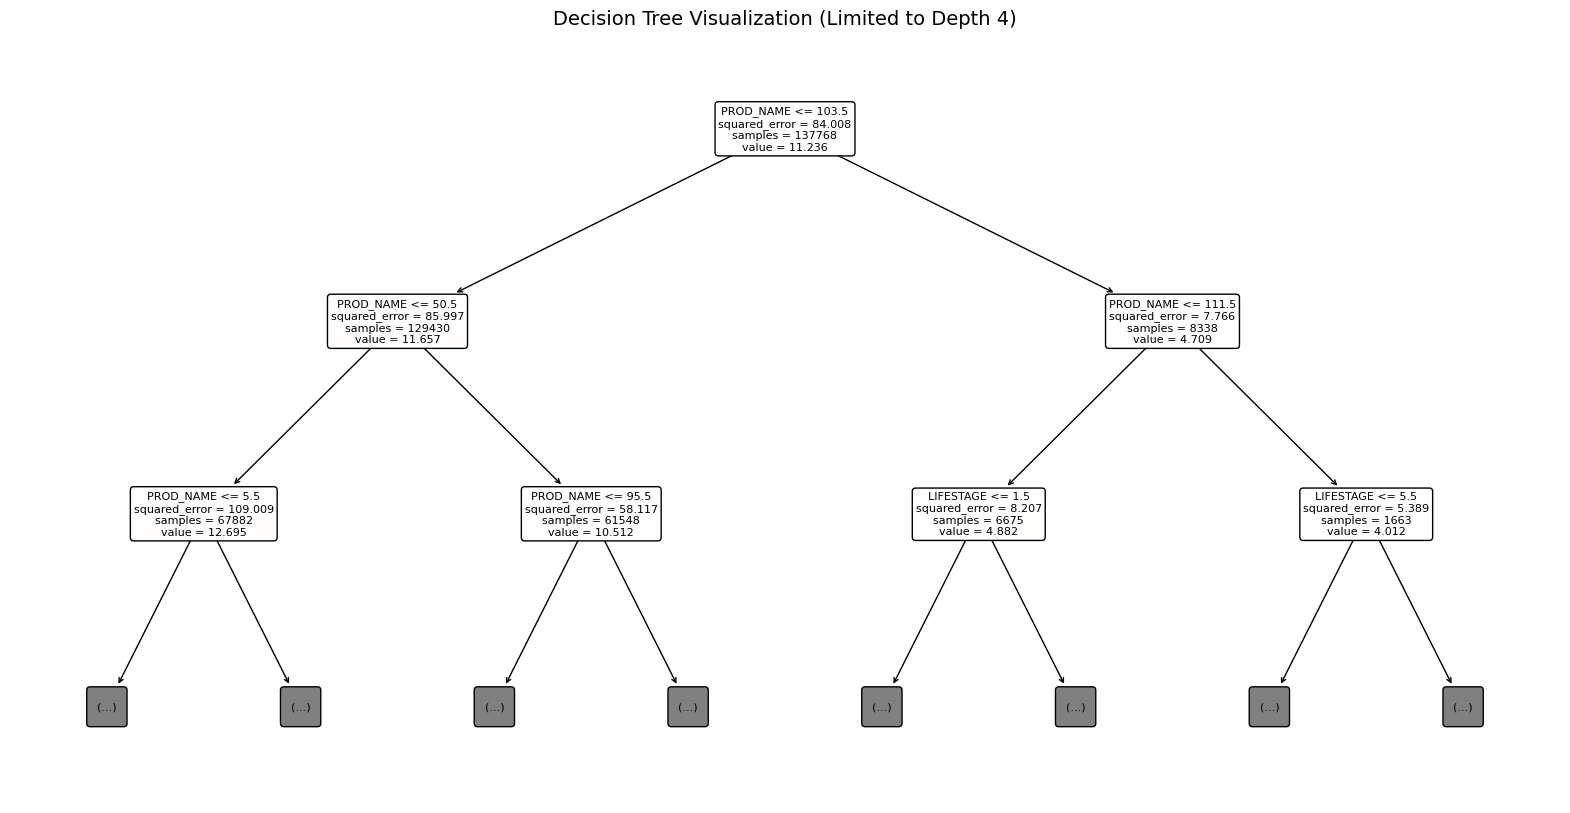

In [244]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



# Plot the Decision Tree with a maximum of 10 branches (approx. depth 4)
plt.figure(figsize=(20, 10))  # Adjust size for better visibility
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=8, max_depth=2)
plt.title("Decision Tree Visualization (Limited to Depth 4)", fontsize=14)
plt.show()
